In [2]:
import scanpy as sc
import os 

In [1]:
data_dir = "/home/igarzonalva/Proyecto_SC_TNBC/GSE161529/Integration/adata/adata_scanvi.h5ad"

In [3]:
adata = sc.read_h5ad(data_dir)

In [4]:
adata

AnnData object with n_obs × n_vars = 152319 × 18088
    obs: 'sample', 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt', 'complexity', 'doublet_scores', 'predicted_doublets', 'n_genes', 'n_counts', 'celltypist_labels_Immune_All_High', 'celltypist_scores_Immune_All_High', 'celltypist_labels_Cells_Adult_Breast', 'celltypist_scores_Cells_Adult_Breast', 'batch', 'subtype', 'leiden', 'GenAnno', 'cell_type'
    var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches'
    uns: 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_pca_MDE', 'X_scANVI', 'X_scVI', 'X_scanvi_MDE', 'X_scvi_MDE'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

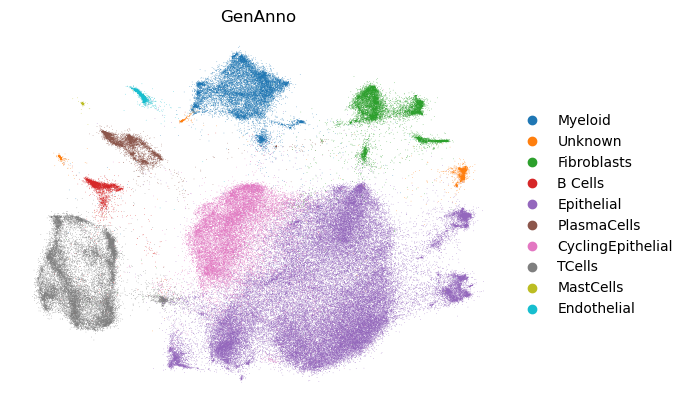

In [5]:
sc.pl.embedding(
    adata,
    basis="X_scanvi_MDE",
    color=["GenAnno"],
    frameon=False,
    ncols=1)

In [11]:
import scvi 

/home/igarzonalva/.conda/envs/scvi-env/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/home/igarzonalva/.conda/envs/scvi-env/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/home/igarzonalva/.conda/envs/scvi-env/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)
/home/igarzonalva/.conda/envs/scvi-env/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing CSCDataset from `anndata.experimental` is deprecated. Import anndata.abc.CSCDataset instead.
  warnings.warn(msg, FutureWarning)
/home/igarzonalva/.conda/envs/scvi-env/lib/python3.12/site-packages/anndat

In [8]:
adata_hvg = adata[:,adata.var["highly_variable"]].copy()

In [9]:
adata_hvg

AnnData object with n_obs × n_vars = 152319 × 4000
    obs: 'sample', 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt', 'complexity', 'doublet_scores', 'predicted_doublets', 'n_genes', 'n_counts', 'celltypist_labels_Immune_All_High', 'celltypist_scores_Immune_All_High', 'celltypist_labels_Cells_Adult_Breast', 'celltypist_scores_Cells_Adult_Breast', 'batch', 'subtype', 'leiden', 'GenAnno', 'cell_type'
    var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches'
    uns: 'hvg', 'leiden', 'log1p', 'neighbors', 'pca', 'GenAnno_colors'
    obsm: 'X_pca', 'X_pca_MDE', 'X_scANVI', 'X_scVI', 'X_scanvi_MDE', 'X_scvi_MDE'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [12]:
scanvi_model = scvi.model.SCANVI.load("/home/igarzonalva/Proyecto_SC_TNBC/GSE161529/Integration/models/scanvi_model", adata_hvg)


INFO     File /home/igarzonalva/Proyecto_SC_TNBC/GSE161529/Integration/models/scanvi_model/model.pt already        
         downloaded                                                                                                


/home/igarzonalva/.conda/envs/scvi-env/lib/python3.12/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/igarzonalva/.conda/envs/scvi-env/lib/python3.1 ...
/home/igarzonalva/.conda/envs/scvi-env/lib/python3.12/site-packages/scvi/model/base/_save_load.py:76: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed

In [13]:
adata.obs["predicted_labels"] = scanvi_model.predict()

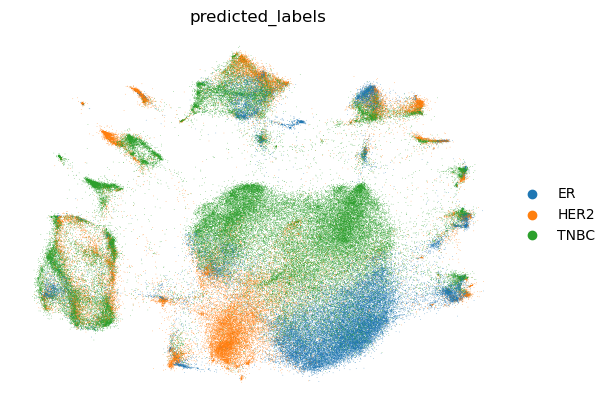

In [14]:
sc.pl.embedding(
    adata,
    basis="X_scanvi_MDE",
    color=["predicted_labels"],
    frameon=False,
    ncols=1)

In [19]:
adata.obs['cell_type'].dtype

CategoricalDtype(categories=['Myeloid', 'Unknown', 'Fibroblasts', 'B Cells', 'Epithelial',
                  'PlasmaCells', 'CyclingEpithelial', 'TCells', 'MastCells',
                  'Endothelial'],
, ordered=False, categories_dtype=object)